### How to detect Outliers

    1. Visualization
    2. IQR (Inter Quatile Range)
    
        lower_bound = q1 - (iqr*1.5)
        upper_bound = q3 + (iqr*1.5)
        
        Values in between lower_bound and upper bound will not be outliers
        
    

In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from matplotlib.animation import FuncAnimation

In [43]:
%matplotlib notebook

In [3]:
dates = pd.date_range("20210116", periods=10)

In [4]:
values

NameError: name 'values' is not defined

In [15]:
np.delete(values, 0)

array([14, 13, 33, 14, 18, 17, 39, 12, 20])

In [16]:
np.append(values, 20)

array([23, 14, 13, 33, 14, 18, 17, 39, 12, 20, 20])

In [18]:
help(FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, *, cache_frame_data=True, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : `~matplotlib.figure.Figure`
 |      The figure object used to get needed events, such as draw or resize.
 |  
 |  func : callable
 |      The function to call at each frame.  The first argument will
 |      be the next value in *frames*.   Any additional positional
 |      arguments can be supplied via the *fargs* parameter.
 |  
 |      The required signature is::
 |  
 |          def func(frame, *fargs) -> iterable_of_artists
 |  
 |      If ``blit == True``, *func* must return an iterable of all artists
 |      that were modified or created. This information is used by the blitting
 |      algorithm to determine which parts of the figure have to be update

In [20]:
dates1 = dates.strftime("%d-%m")
values = np.random.randint(10, 40, 10)
fig = plt.figure()
plt.plot(dates1, values, 'ro--')

def function(wait=None):
    global values
    values = np.delete(values, 0)
    values = np.append(values, np.random.randint(10, 40, 1))
    plt.plot(dates1, values, 'ro--')
    
f = FuncAnimation(fig, function)
plt.show()

<IPython.core.display.Javascript object>

In [21]:
dates1 = dates.strftime("%d-%m")
values = np.random.randint(10, 40, 10)
fig, ax = plt.subplots()
ax.plot(dates1, values, 'ro--')

def function(wait=None):
    global values
    ax.clear()
    values = np.delete(values, 0)
    values = np.append(values, np.random.randint(10, 40, 1))
    ax.plot(dates1, values, 'ro--')
    
f = FuncAnimation(fig, function)
plt.show()

<IPython.core.display.Javascript object>

In [18]:
from time import sleep

dates1 = dates.strftime("%d-%m")
values = np.random.randint(10, 40, 10)
fig, ax = plt.subplots()
ax.plot(dates1, values, 'ro--')

def function(frames=None):
    global values
    sleep(1)
    ax.clear()
    values = np.delete(values, 0)
    values = np.append(values, np.random.randint(10, 40, 1))
    ax.plot(dates1, values, 'ro--')
    
f = FuncAnimation(fig, function)
print(f)
plt.show()

<IPython.core.display.Javascript object>

In [12]:
list(f.frame_seq)

[0]

### Corona Live Plot (Do by Yourself)

In [19]:
import psutil

In [20]:
print(dir(psutil))

['ABOVE_NORMAL_PRIORITY_CLASS', 'AF_LINK', 'AIX', 'AccessDenied', 'BELOW_NORMAL_PRIORITY_CLASS', 'BSD', 'CONN_CLOSE', 'CONN_CLOSE_WAIT', 'CONN_CLOSING', 'CONN_DELETE_TCB', 'CONN_ESTABLISHED', 'CONN_FIN_WAIT1', 'CONN_FIN_WAIT2', 'CONN_LAST_ACK', 'CONN_LISTEN', 'CONN_NONE', 'CONN_SYN_RECV', 'CONN_SYN_SENT', 'CONN_TIME_WAIT', 'Error', 'FREEBSD', 'HIGH_PRIORITY_CLASS', 'IDLE_PRIORITY_CLASS', 'IOPRIO_HIGH', 'IOPRIO_LOW', 'IOPRIO_NORMAL', 'IOPRIO_VERYLOW', 'LINUX', 'MACOS', 'NETBSD', 'NIC_DUPLEX_FULL', 'NIC_DUPLEX_HALF', 'NIC_DUPLEX_UNKNOWN', 'NORMAL_PRIORITY_CLASS', 'NoSuchProcess', 'OPENBSD', 'OSX', 'POSIX', 'POWER_TIME_UNKNOWN', 'POWER_TIME_UNLIMITED', 'PermissionError', 'Popen', 'Process', 'ProcessLookupError', 'REALTIME_PRIORITY_CLASS', 'STATUS_DEAD', 'STATUS_DISK_SLEEP', 'STATUS_IDLE', 'STATUS_LOCKED', 'STATUS_PARKED', 'STATUS_RUNNING', 'STATUS_SLEEPING', 'STATUS_STOPPED', 'STATUS_TRACING_STOP', 'STATUS_WAITING', 'STATUS_WAKING', 'STATUS_ZOMBIE', 'SUNOS', 'TimeoutExpired', 'WINDOWS', '

In [22]:
psutil.cpu_count()

8

In [25]:
psutil.version_info

(5, 7, 2)

In [27]:
psutil.cpu_freq()

scpufreq(current=1400.0, min=0.0, max=1800.0)

In [34]:
psutil.cpu_percent()

18.0

In [35]:
psutil.cpu_stats()

scpustats(ctx_switches=267658306, interrupts=326884946, soft_interrupts=0, syscalls=893110684)

In [36]:
psutil.cpu_times()

scputimes(user=28925.968749999996, system=13046.671875, idle=292515.5625, interrupt=5020.09375, dpc=560.984375)

In [37]:
psutil.cpu_times_percent()

scputimes(user=13.8, system=5.2, idle=79.0, interrupt=1.8, dpc=0.2)

In [38]:
psutil.virtual_memory()

svmem(total=8470630400, available=3029958656, percent=64.2, used=5440671744, free=3029958656)

In [39]:
for i in range(10):
    sleep(1)
    print(psutil.cpu_percent())

21.4
20.6
31.6
20.2
18.4
22.6
21.9
20.3
17.9
22.1


In [51]:
x_values = list(range(1, 11))
cpu_per = [psutil.cpu_percent() for i in range(10)]
fig, ax = plt.subplots(figsize=(5, 3), facecolor="black")
ax.plot(x_values, cpu_per, 'ro--')
ax.set_facecolor("black")
ax.tick_params(labelcolor="white")
def animation(default=None):
    global cpu_per
    # sleep(1)
    ax.clear()
    cpu_per.pop(0)
    cpu_per.append(psutil.cpu_percent())
    ax.plot(x_values, cpu_per, 'ro--')
    ax.tick_params(labelcolor="white")
    
    
f = FuncAnimation(fig, animation)
plt.show()

<IPython.core.display.Javascript object>

In [54]:
tip = sns.load_dataset("tips")

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


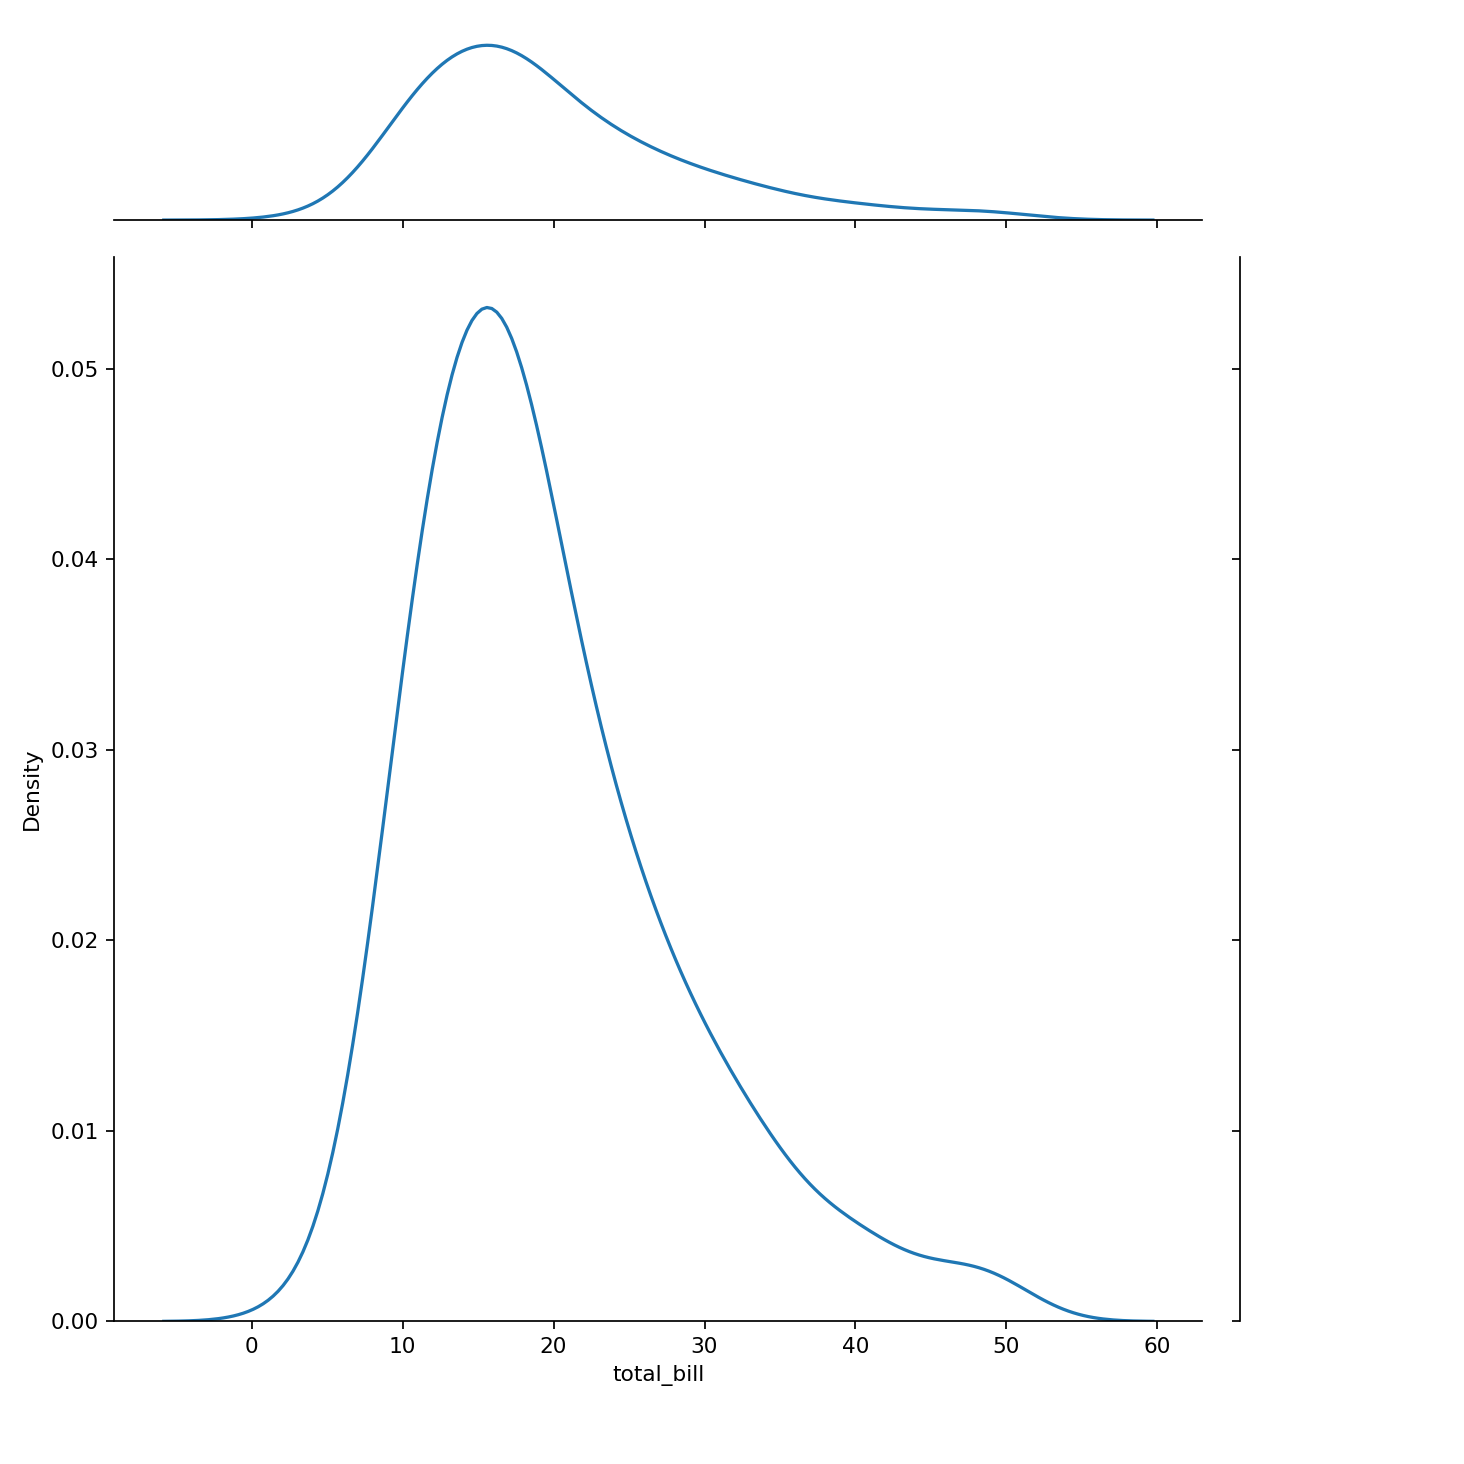

In [56]:
sns.jointplot(tip['total_bill'], kind="kde")